In [53]:
## Load packages
library(ggplot2)
library(magrittr)
library(dplyr)
options(repr.plot.width=20, repr.plot.height=10)
#setwd("/mnt/Win11/Users/pdime/Documents/Omega/USM PhD/Projects/Active/Blackfin Tuna/Analyses/extramiss/outlier_analyses/")
setwd("C:/Users/pdime/Omega/USM PhD/Projects/Active/Blackfin Tuna/Analyses/thinned/outlier_analysis/")
snp.names <- readLines("../data/snp.names")
all.fst <- read.csv("outflank/outflank.thinned.csv")[,c(1,2,3,15)]
all.fst$LocusName <- gsub("\\.[0-9]+", "", all.fst$LocusName)
head(all.fst)

,LocusName,He,FST,OutlierFlag
,<chr>,<dbl>,<dbl>,<lgl>
1,232_pilon_2036,0.01916753,-0.004781964,FALSE
2,335_pilon_972,0.02402047,-0.003604222,FALSE
3,341_pilon_1400,0.14499328,-0.000383334,FALSE
4,536_pilon_3491,0.03420425,0.009488074,FALSE
5,794_pilon_11572,0.03748631,-0.002508902,FALSE
6,1009_pilon_1199,0.02394858,0.003266072,FALSE


## Bayescan results
- Bayescan detected no outlier loci

## outFlank results

In [5]:
outflank <- readLines("outflank/outflank.outliers.loci")

### Baypass results

In [6]:
baypass <- readLines("baypass/baypass.outliers.loci")

#### Are there any common loci?

In [10]:
both <- intersect(outflank, baypass)
both

[1] "102827_pilon_7466" "153512_pilon_132"

In [54]:
all.fst$outlier <- "neutral"
all.fst$outlier[all.fst$LocusName %in% baypass] <- "baypass"
all.fst$outlier[all.fst$LocusName %in% outflank] <- "outflank"
all.fst$outflank <- all.fst$outlier == "outflank"
all.fst$baypass <- all.fst$outlier == "baypass"
all.fst$outlier[all.fst$LocusName %in% both] <- "both"
all.fst$outlier <- ordered(all.fst$outlier, levels = c("neutral", "baypass", "outflank", "both"))

all.fst %<>%
  mutate(order = 
    case_when(
      (outlier == "neutral") ~ 1,
      (outlier == "baypass") ~ 2,
      (outlier == "outflank") ~ 3,
      (outlier == "both") ~ 4,
    )
  ) %>%
  arrange(order)
head(all.fst)

,LocusName,He,FST,OutlierFlag,outlier,outflank,baypass,order
,<chr>,<dbl>,<dbl>,<lgl>,<ord>,<lgl>,<lgl>,<dbl>
1,232_pilon_2036,0.01916753,-0.004781964,FALSE,neutral,FALSE,FALSE,1
2,335_pilon_972,0.02402047,-0.003604222,FALSE,neutral,FALSE,FALSE,1
3,341_pilon_1400,0.14499328,-0.000383334,FALSE,neutral,FALSE,FALSE,1
4,536_pilon_3491,0.03420425,0.009488074,FALSE,neutral,FALSE,FALSE,1
5,794_pilon_11572,0.03748631,-0.002508902,FALSE,neutral,FALSE,FALSE,1
6,1009_pilon_1199,0.02394858,0.003266072,FALSE,neutral,FALSE,FALSE,1


In [97]:
putatives <- all.fst %>% filter(He >= 0.1 & (outflank | baypass))
length(putatives$LocusName)
putatives$LocusName

[1] 22

[1] "6480_pilon_17463"   "11179_pilon_1930"   "11596_pilon_17128" 
 [4] "20575_pilon_706"    "20780_pilon_8971"   "32478_pilon_15937" 
 [7] "32560_pilon_1_8123" "35685_pilon_13819"  "87933_pilon_1351"  
[10] "91228_pilon_1890"   "97863_pilon_15983"  "138456_pilon_2465" 
[13] "161105_pilon_7928"  "191769_pilon_2576"  "225438_pilon_12554"
[16] "239201_pilon_920"   "289075_pilon_3166"  "221381_pilon_14681"
[19] "234778_pilon_5121"  "276240_pilon_2247"  "295366_pilon_7628" 
[22] "487936_pilon_47"

In [94]:
corrected.names <- strsplit(putatives$LocusName, "_")
corr.names <- FALSE

Replacing the final underscore with a whitespace will make the locus and positions names suitable for isolation using `vcftools --exclude-positions` and `--positions`.

In [95]:
for(i in 1:length(corrected.names)){
    .string <- corrected.names[[i]]
    strlen <- length(.string)
    chr <- paste(.string[1:(strlen-1)], collapse = "_")
    corr.names[i] <- paste(chr, .string[strlen], sep = " ")
}
corr.names

[1] "6480_pilon 17463"   "11179_pilon 1930"   "11596_pilon 17128" 
 [4] "20575_pilon 706"    "20780_pilon 8971"   "32478_pilon 15937" 
 [7] "32560_pilon_1 8123" "35685_pilon 13819"  "87933_pilon 1351"  
[10] "91228_pilon 1890"   "97863_pilon 15983"  "138456_pilon 2465" 
[13] "161105_pilon 7928"  "191769_pilon 2576"  "225438_pilon 12554"
[16] "239201_pilon 920"   "289075_pilon 3166"  "221381_pilon 14681"
[19] "234778_pilon 5121"  "276240_pilon 2247"  "295366_pilon 7628" 
[22] "487936_pilon 47"

In [96]:
write.table(corr.names, file = "bft.putative.outliers", row.names = F, col.names = F, quote = F)

## The plot

In [51]:
mycolors <- c("#bbbbbb","#ea3c00", "dodgerblue", "black")

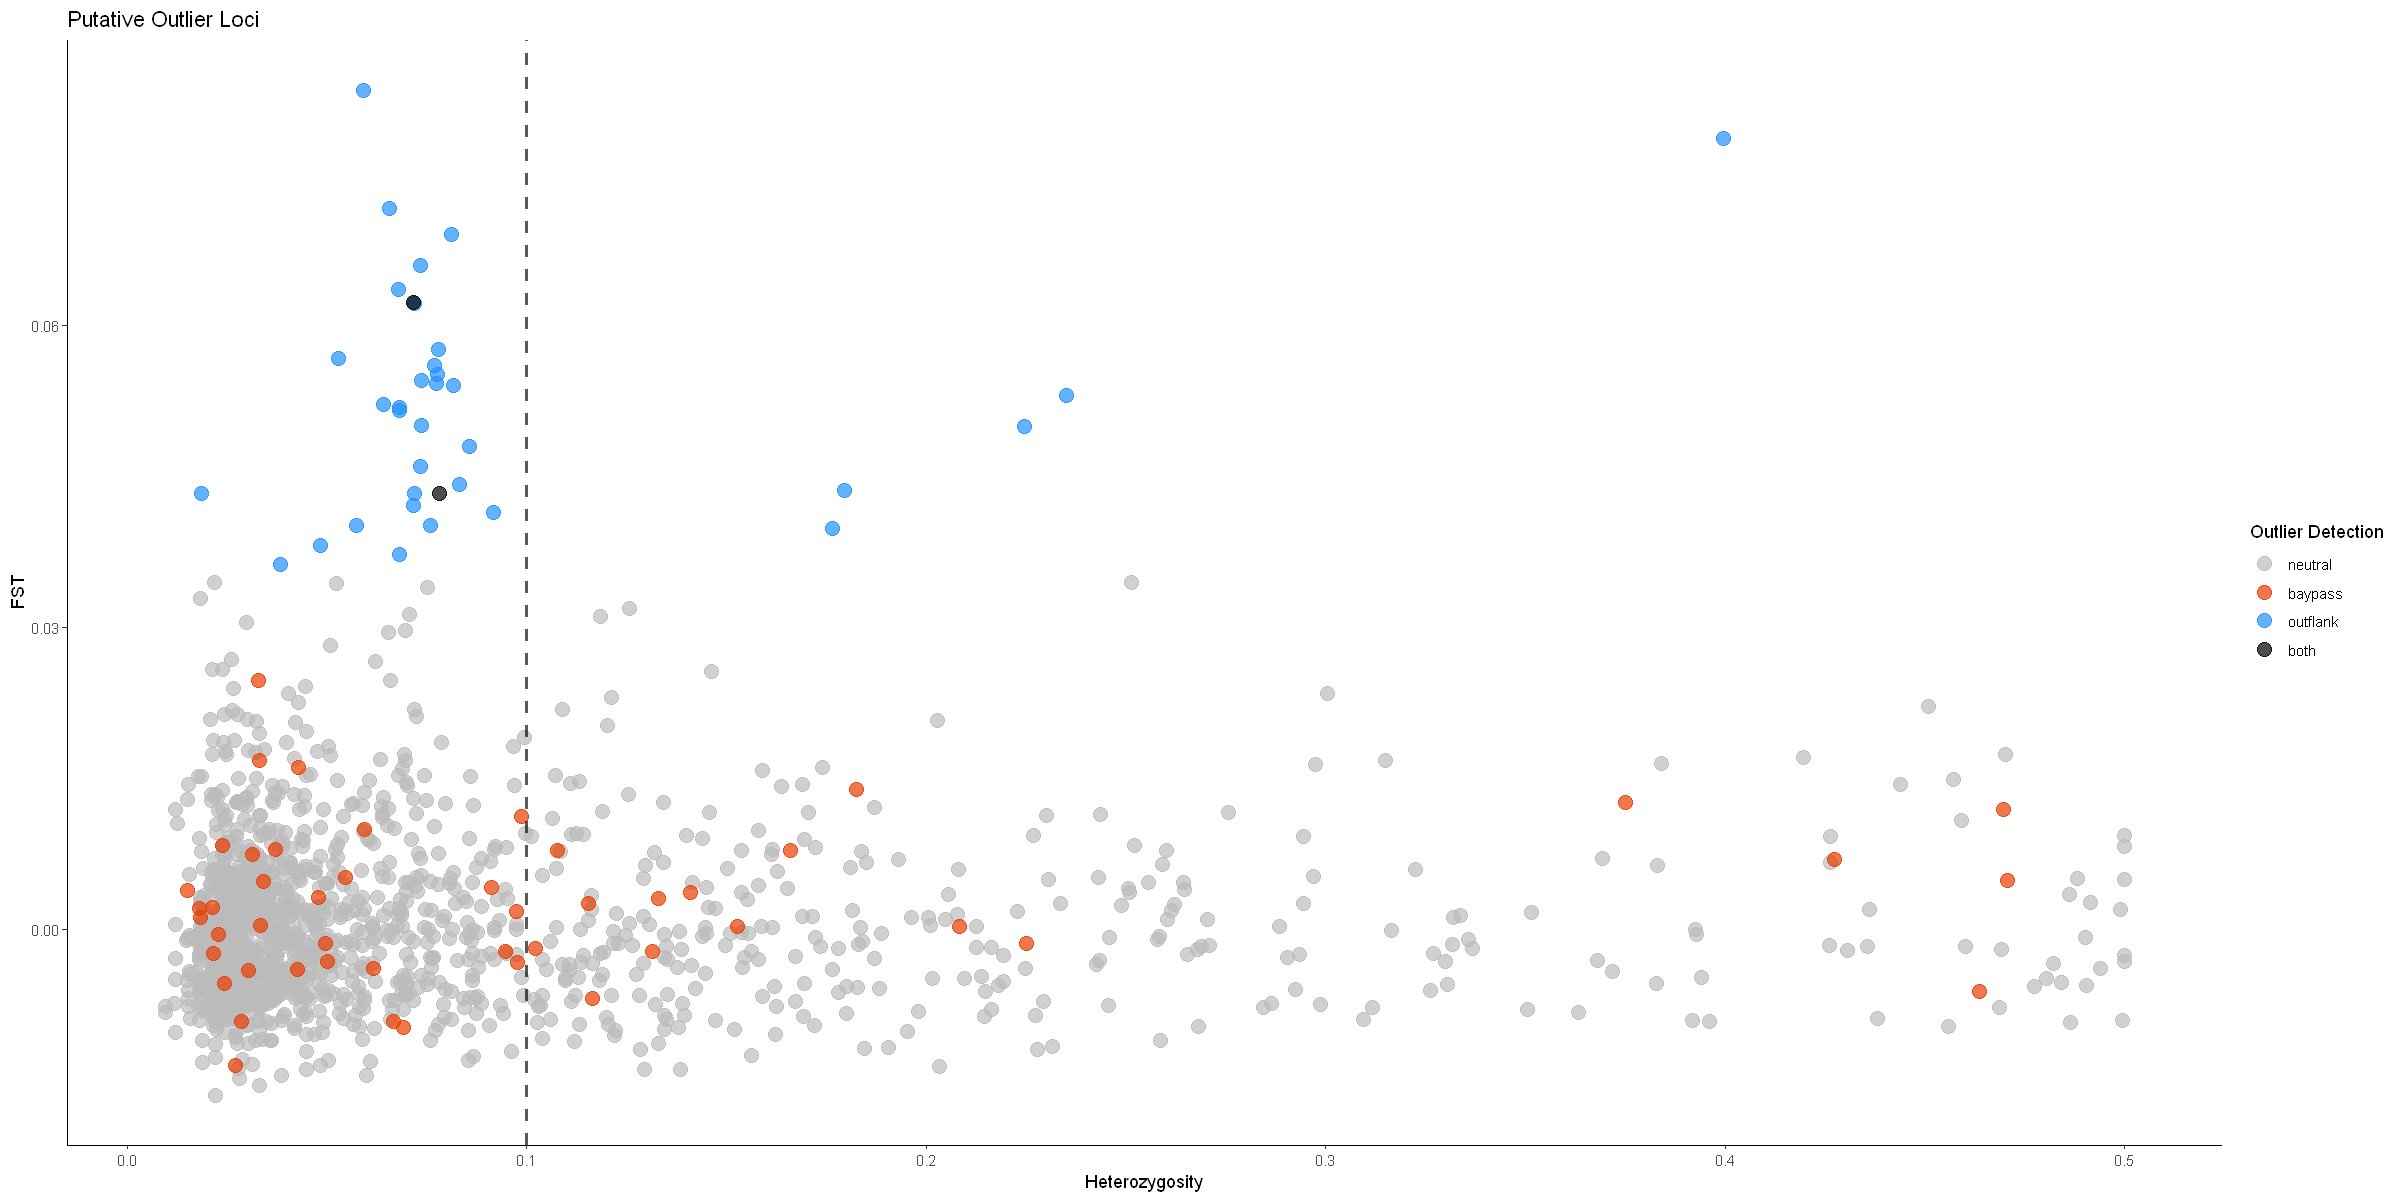

In [60]:
all.fst %>%
  ggplot(x = He, y = FST) +
  geom_point(aes(x = He, y = FST, col = outlier), alpha = 0.7,  size = 4) +
  geom_vline(xintercept = 0.1, alpha = 0.65, linetype = "dashed", size = 1) +
  labs(title = "Putative Outlier Loci", x = "Heterozygosity", y = "FST", color = "Outlier Detection", shape = "Bayescan Detection") +
  scale_color_manual(values = mycolors) +
  theme_classic()

In [61]:
ggsave("outliers.png", height = 6, width = 12, units = "in")